### NAME: Σέργκι, SURNAME: Πούλα, ΑΜ: 8200141, EMAIL: t8200141@aueb.gr

In this project we are going to take a look in the **Airbnbs of Athens**. We are going to analyse topics about their neighbourhoods, their prices, occupancy, room types and more. We will create visualizations and make some conclusions for their productiveness.

* We will start off by importing all the necessary libraries and csv files.pyterpyter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

The **list** dataframe will be our most important one for this project. Here we have all the personal data of the host of the airbnbs, data for the airbnbs.


In [2]:
list = pd.read_csv("listings.csv")
list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

The **nbh** dataframe contains all the data about the Locations/Neighbourhoods in Athens where there are airbnbs.

In [3]:
nbh = pd.read_csv("neighbourhoods.csv")
nbh.columns

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

In the **reviews** dataframe we have placed data mainly for the reviews/comments that visitors write, each one with it's date, the listing_id which is the airbnb it is reffering to, the data of the person who wrote the comment and it's unique id. 

In [4]:
reviews = pd.read_csv("reviews.csv")
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

Lastly, in the **calendar** dataframe we have data for dates and their availability, the prices of each listing_id for the specific date and how many nights a person shall stay. 

In [5]:
calendar = pd.read_csv("calendar.csv")
calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

## Section for cleaning up our dataframes!

It is common that a lot of data comes with issues. This kind of issues may be NAN values, in other words, blank values, they can also have abnormal values, for instance a price of a hotel could be 1 dollar, which is something that couldn't really happen in the real word. We need to replace these data with normal ones so we dont get wrong analyses in our survey.

We will start off with the list dataframe. 

First we will check for the columns 'price' if there are any nan values:

In [6]:
list['price'].isna().any()

False

Since we didn't find any nan value, let's check for abnormal values, for this step we will sort the values to check for extreme values.

In [7]:
list['price'] = list['price'].str.replace('$', '').str.replace(',','').astype(float)

In [8]:
list = list.sort_values(by= 'price', ascending= True)

In [9]:
list['price']

12128       10.0
2350        10.0
1008        10.0
4188        10.0
4202        11.0
          ...   
7458      8000.0
1623      8000.0
2992      8000.0
6520      8000.0
3641     80275.0
Name: price, Length: 12955, dtype: float64

From the list above we can see that prices such as 80275 dollars cannot exist.

Now we need to find all the abnormal low prices, let's see for the first 100 rows.

In [10]:
list['price'][:90]

12128    10.0
2350     10.0
1008     10.0
4188     10.0
4202     11.0
         ... 
11764    17.0
4865     17.0
3136     17.0
4862     17.0
7218     18.0
Name: price, Length: 90, dtype: float64

As wee see prices like 10 dollars are really low but they could be true, if we take out the taxes for cleaning the room and more. So we decide to leave them as they are. 

We can either delete those rows with high abnormal prices or replace the values with normal ones, we are choosing to change them into the **mean price**. 

First of all, we need to search which prices are more common, we don't want any extreme values to affect the mean price, so we will find the gravity of each range.

In [11]:
x = list[list['price']<= 100]['id'].count()
x1 = list[(list['price']<= 1000) & (list['price']>100)]['id'].count()
x2 = list[(list['price']> 1000)]['id'].count()

Let's see which interval has the most values:

In [12]:
x

9147

In [13]:
x1

3767

In [14]:
x2

41

We will calculate for each space the mean price of it using the method .mean()

In [15]:
mean = list[list['price']<= 100]['price'].mean()
mean1 = list[(list['price']<= 1000) & (list['price']>100)]['price'].mean()
mean2= list[(list['price']> 1000)]['price'].mean()

As we saw from the variety of values in each interval, the x has the most of them by far, the x1 has the 1/3 of the first one and the x2 has only 42 values, so we are deciding to place the weights as follows: 

In [16]:
weight_x = 1 
weight_x1 = 0.1 
weight_x2 = 0.01

In [17]:
mean_price = (mean * weight_x + mean1 * weight_x1 + mean2 * weight_x2) / (weight_x + weight_x1 + weight_x2)
mean_price

111.75227121882936

Now that we got our mean price we will replace any abnormal price with it.

In [18]:
list['price'].tail(50)

4797       870.0
4489       910.0
7475       929.0
4753       965.0
12503      994.0
12511      995.0
6575      1000.0
745       1000.0
5382      1000.0
12508     1015.0
12505     1028.0
3116      1040.0
10692     1041.0
141       1050.0
2351      1069.0
7485      1071.0
12311     1079.0
12328     1087.0
12317     1094.0
12326     1098.0
12322     1126.0
4630      1142.0
4226      1180.0
7313      1214.0
12320     1220.0
12315     1250.0
6196      1303.0
4215      1309.0
9319      1400.0
5769      1440.0
6535      1445.0
6668      1463.0
1839      1500.0
8595      1500.0
2868      1649.0
9967      1702.0
5246      1980.0
4894      2000.0
5986      2500.0
5432      3051.0
2466      4849.0
932       5000.0
6619      8000.0
6620      8000.0
3054      8000.0
7458      8000.0
1623      8000.0
2992      8000.0
6520      8000.0
3641     80275.0
Name: price, dtype: float64

In order for those prices to not affect our data analysing we are choosing to evaluate some of them abnormal, any price larger than 5000 dollars per night will be concidered abnormal and so replaced with the mean price.

In [19]:
list.loc[(list['price'] >5000), 'price'] = mean_price

In [20]:
list = list.sort_values(by= 'price', ascending= True)

In [21]:
list['price']

12128      10.0
2350       10.0
1008       10.0
4188       10.0
4202       11.0
          ...  
4894     2000.0
5986     2500.0
5432     3051.0
2466     4849.0
932      5000.0
Name: price, Length: 12955, dtype: float64

Now that we regulated those abnormal prices we expect to find them in the dataframe calendar too, let's check the calendar now.

In [22]:
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',','').astype(float)

In [23]:
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '').str.replace(',','').astype(float)

In [24]:
calendar = calendar.sort_values(by = 'price', ascending = True)

In [25]:
calendar['price'][:36180]

1403749     0.0
1403672     0.0
1403673     0.0
1403674     0.0
1403675     0.0
           ... 
4620126    17.0
4492803    17.0
372391     18.0
2115995    18.0
372763     18.0
Name: price, Length: 36180, dtype: float64

In [26]:
calendar['price'].tail(23980)

2574984     2025.0
2574985     2025.0
2574986     2025.0
2574987     2025.0
1037197     2034.0
            ...   
1313012    85140.0
1313013    85140.0
1313014    85140.0
1313045    85140.0
1312993    85140.0
Name: price, Length: 23980, dtype: float64

Clearly we see the same problem as expected, we need to change all these values with the mean price, so we will make it a string one to replace it, we must be carefull with the prices because we don't want to change any other price, for example any $0.00 dollar wich would probably mean that the airbnb is not available yet for that date or any price such as 67.00 dollars which is a small price but that doesn't mean it is abnormal, because it could be for 2024 so the host keeps it low to book it from now for the profit.

In [27]:
mean_price

111.75227121882936

In [28]:
calendar.loc[calendar['price'] >5000, 'price'] = mean_price

We will sort them again so the new mean prices find their place in the sorted dataframe. 

In [29]:
calendar = calendar.sort_values(by = 'price', ascending = True)

In [30]:
calendar['price']

1403749       0.0
1403639       0.0
1403640       0.0
1403641       0.0
1403642       0.0
            ...  
4182880    5000.0
4182879    5000.0
4182878    5000.0
4182885    5000.0
3019706    5000.0
Name: price, Length: 4728229, dtype: float64

And we will do the same steps for the column: 'adjusted_price'

In [31]:
calendar.loc[calendar['adjusted_price'] >5000, 'adjusted_price'] = mean_price

In [32]:
calendar = calendar.sort_values(by = 'adjusted_price', ascending = True)

In [33]:
calendar['adjusted_price']

1403749       0.0
1403673       0.0
1403674       0.0
1403675       0.0
1403676       0.0
            ...  
327258     5000.0
327257     5000.0
327256     5000.0
4182660    5000.0
3019706    5000.0
Name: adjusted_price, Length: 4728229, dtype: float64

Let's check for any NaN values before we move one:

In [34]:
calendar['price'].isna().any()

False

In [35]:
calendar['adjusted_price'].isna().any()

False

Now that we changed those abnormal values to mean ones, lets continue to other dataframes.

In [36]:
nbh

,neighbourhood_group,neighbourhood
0,NaN,1Ο ΝΕΚΡΟΤΑΦΕΙΟ
1,NaN,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ
2,NaN,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ
3,NaN,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ
4,NaN,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ
5,NaN,ΑΚΡΟΠΟΛΗ
6,NaN,ΑΜΠΕΛΟΚΗΠΟΙ
7,NaN,ΑΝΩ ΚΥΨΕΛΗ
8,NaN,ΑΝΩ ΠΑΤΗΣΙΑ
9,NaN,ΒΟΤΑΝΙΚΟΣ


All the neighbourhoods seem to be fine, it doesnt have all of them though as someone might expect, those are not all the neighbourhoods in Athens with Airbnbs, a lot of them are missing, lets go to another dataframe.

In [37]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...
...,...,...,...,...,...,...
630573,975966554881091774,979517013920189393,2023-09-13,30142078,Ogan,"Nice location, good cleaning service. Room get..."
630574,976076532701121190,981716147162450311,2023-09-16,456119105,Walter,"Ci siamo trovati molto bene, lei è stata molto..."
630575,977373669051180593,981028500969444691,2023-09-15,506847475,Timothy,"Es ist eine super schöne Wohnung, perfekt gele..."
630576,977373669051180593,984569298719800410,2023-09-20,8366675,Rosie,Zavass et son épouse sont très aimables. <br/>...


Everything seems to work fine.

## Q1: Neighbourhood Listings in Descending Order

In our first step we want to analyse how many airbnbs are exactly in each neighbourhood and place them in a descending order so as to know which locations are more popular than others.

For this cause we will use the list dataframe with the column: 'neighbourhood_cleansed' which has all the neighbourhoods cleaned and ready to use! 

In [38]:
Listings_Per_Neighbourhood = list['neighbourhood_cleansed'].value_counts().reset_index()

In [39]:
Listings_Per_Neighbourhood.columns = ['Neighbourhood', 'Listings Count']

In [40]:
Listings_Per_Neighbourhood = Listings_Per_Neighbourhood.sort_values(by='Listings Count', ascending=False)

In [41]:
Listings_Per_Neighbourhood

,Neighbourhood,Listings Count
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416
1,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
2,ΝΕΟΣ ΚΟΣΜΟΣ,980
3,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,979
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
5,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583
6,ΠΑΓΚΡΑΤΙ,511
7,ΑΜΠΕΛΟΚΗΠΟΙ,452
8,ΚΟΛΩΝΑΚΙ,425
9,ΑΚΡΟΠΟΛΗ,386


**Conclusion:**
'Πλάκα' has the most airbnbs with the number of 2416 and 'Πενταγωνο' is the less popular neighbourhood to have an airbnb with only 2. 
With this analyse someone can know which neighbourhoods gather more visitors and maybe create his own one over there!

**Caution**: Keep in mind that in the list above from the data we extracted not all neighbourhoods are involved, some locations may differ in the whole neighbourhood list!

### Q2: Neighbourhood Prices in Descending Order

Now we will check the prices for each neighbourhood. Specifically we will calculate median, mean prices per neighbourhood, standard deviation among the prices and again as we did before the airbnbs per neighbourhood so we can compare them to the prices! 

In [42]:
list['price'] 

12128      10.0
2350       10.0
1008       10.0
4188       10.0
4202       11.0
          ...  
4894     2000.0
5986     2500.0
5432     3051.0
2466     4849.0
932      5000.0
Name: price, Length: 12955, dtype: float64

Now we will group them by neighbourhood so we can calculate the metrics of the prices. 

In [43]:
list_gb = list.groupby('neighbourhood_cleansed')

Now that we have everything grouped we will calculate for each group/neighbourhood the metrics we mentioned.

In [44]:
median_price = list_gb['price'].median().reset_index()
mean_price = list_gb['price'].mean().reset_index()
std_dev_price = list_gb['price'].std().reset_index()
num_listings = list_gb['neighbourhood_cleansed'].value_counts().reset_index()

We will rename the columns to represent the metrics. 

In [45]:
median_price.rename(columns={'price': 'median_price'}, inplace=True)
mean_price.rename(columns={'price': 'mean_price'}, inplace=True)
std_dev_price.rename(columns={'price': 'std_dev_price'}, inplace=True)
num_listings.columns = ['neighbourhood_cleansed', 'number_of_listings']

Finaly we will merge them all to the same dataframe.

In [46]:
neighbourhood_statistics = median_price.merge(mean_price, on= 'neighbourhood_cleansed', how='inner')
neighbourhood_statistics = neighbourhood_statistics.merge(std_dev_price, on= 'neighbourhood_cleansed', how='inner')
neighbourhood_statistics = neighbourhood_statistics.merge(num_listings, on= 'neighbourhood_cleansed', how='inner')

We will sort them based on the median price

In [47]:
neighbourhood_statistics = neighbourhood_statistics.sort_values(by='median_price', ascending=False)

In [48]:
neighbourhood_statistics

,neighbourhood_cleansed,median_price,mean_price,std_dev_price,number_of_listings
39,ΡΗΓΙΛΛΗΣ,120.0,367.800000,578.622675,5
16,ΖΑΠΠΕΙΟ,114.0,175.072995,175.631867,161
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,137.385659,164.125427,2416
5,ΑΚΡΟΠΟΛΗ,100.0,134.036935,127.684324,386
21,ΚΟΛΩΝΑΚΙ,100.0,128.595294,104.431349,425
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.284314,104.613533,1122
17,ΘΗΣΕΙΟ,90.0,126.492228,124.176775,386
19,ΚΕΡΑΜΕΙΚΟΣ,89.0,123.883382,136.367487,343
25,ΛΥΚΑΒΗΤΤΟΣ,75.0,104.561728,87.859850,162
10,ΓΚΑΖΙ,70.5,95.792453,75.355882,106


We will give a check to see the correctness of our results. From the start our eyes catches the standard deviation of the first row which has a value of 579. 

In [49]:
list[list['neighbourhood_cleansed']== 'ΡΗΓΙΛΛΗΣ']['price']

1462       71.0
11379      72.0
10271     120.0
12748     176.0
9319     1400.0
Name: price, dtype: float64

The reasons are: First of all we are talking for a neighbourhood with only five airbnb's so each value has a significant affect in our result, secondly we have an airbnb with a price 1400 euros per night with extreme affect in the total result.

### Q3: Availability per Day

Our step now is to check how many airbnbs are available for each passing day. To understand the result we will create a graph that shows for each date the available airbnbs for someone to book.

We will use the calendar which has the columns 'available' and also 'date'

In [50]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [51]:
available = calendar[calendar['available'] == 't'].groupby('date')['available'].count().reset_index()

In [52]:
available

,date,available
0,2023-09-21,540
1,2023-09-22,982
2,2023-09-23,1475
3,2023-09-24,2495
4,2023-09-25,3194
...,...,...
360,2024-09-15,7532
361,2024-09-16,7535
362,2024-09-17,7532
363,2024-09-18,7537


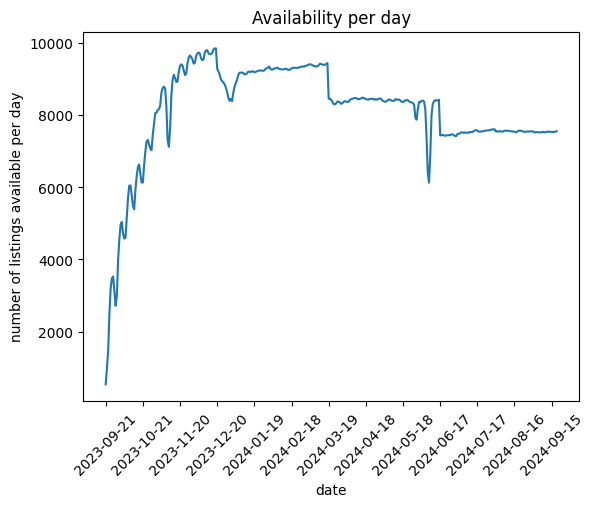

In [53]:
plt.plot(available['date'], available['available'])
plt.title('Availability per day')
plt.xlabel('date')
plt.ylabel('number of listings available per day')
plt.xticks(available['date'][::30], rotation=45)
plt.show()

**Conclusion:**
We see that we have an ascending form of graph, the reason is that the dates refer to a year that is far long from now, so people haven't booked their airbnbs from now, but we can also check that for the summer time of 2024, we have a drop in the plot which means that people have already started booking up for next year!

### Q4: Reviews, Occupacy per Listing, Average Income

For this stage will actually answer three topics. First of all we will check the reviews per listing. More specifically we will see how many reviews each airbnb got. Secondly we will calculate the occupancy of each airbnb for each passing month. Lastly, we will check the average salary that each airbnb got for that occupation.  

#### Reviews per Listing 

Based on the columns of the list dataframe we can use the column 'number of reviews' that gives us the total number of reviews per listing id.

In [54]:
list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

We are taking the columns id and number of reviews per id and placing them in a dataframe called Reviews_Per_Listing

In [55]:
Reviews_Per_Listing = list[['id','number_of_reviews']]

In [56]:
Reviews_Per_Listing = list.sort_values(by ='number_of_reviews', ascending = False)
Reviews_Per_Listing['number_of_reviews']

72       865
154      856
827      778
909      764
254      731
        ... 
12647      0
7866       0
11987      0
10262      0
10978      0
Name: number_of_reviews, Length: 12955, dtype: int64

In order to create a good histogram we will find the min and max price and round up the number for the x axis!

In [57]:
min_reviews = Reviews_Per_Listing['number_of_reviews'].min()
min_reviews

0

In [58]:
max_reviews = Reviews_Per_Listing['number_of_reviews'].max()
max_reviews

865

In [59]:
bin_size = int(np.ceil(max_reviews / 100.0) * 100)
bin_size

900

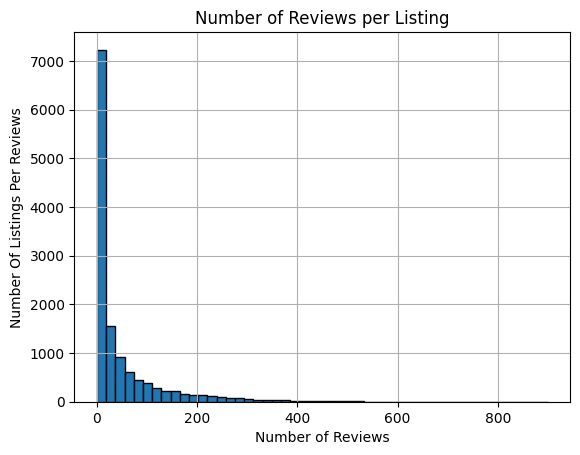

In [60]:
plt.hist(Reviews_Per_Listing['number_of_reviews'],bins=np.linspace(0, bin_size, 50), edgecolor='black')
plt.title('Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Number Of Listings Per Reviews')
plt.grid(True)
plt.show()

In this histogram we see how many times each amount of comments appeared. The comments between 0-100 are the most popular ones as one would expect and specifically the comments between 0-50.

#### Occupancy of each airbnb for each passing month

Because we do not have the data for the bookings we will find the average reviews per month and assume that half of the bookings result in reviews.

Checking the list columns we see a column named reviews per month, we will work on this column.

In [61]:
reviews_per_month = list[['id', 'reviews_per_month']]
reviews_per_month.sort_values(by = 'reviews_per_month', ascending = False)

,id,reviews_per_month
7248,54251276,15.50
11736,914571599230791078,13.30
5559,43778929,11.22
11095,881606431285667955,11.14
12573,952653984892688974,11.00
...,...,...
12320,938456089239692053,NaN
12315,938455193619452300,NaN
9319,741742408032958863,NaN
9967,807721368332995934,NaN


Any NaN value will be considered as zero as no one reviewed that airbnb.

In [62]:
reviews_per_month = reviews_per_month.fillna(0)

Based on our assumption about occupancy we are multiplying by two.

In [63]:
reviews_per_month['occupancy'] = reviews_per_month['reviews_per_month'] * 2

In [64]:
reviews_per_month.sort_values(by = 'occupancy', ascending = False)

,id,reviews_per_month,occupancy
7248,54251276,15.50,31.00
11736,914571599230791078,13.30,26.60
5559,43778929,11.22,22.44
11095,881606431285667955,11.14,22.28
12573,952653984892688974,11.00,22.00
...,...,...,...
12647,959096822199506780,0.00,0.00
7866,618492212858639427,0.00,0.00
11987,921018087752748978,0.00,0.00
10262,832482869847817259,0.00,0.00


#### Average income per month

For this step we will make an assumption that each booking is for a three night stay so we can calculate the average income for each month.

To find the average income per month we first need to find the average price throughout all listings, to do that we will take all the prices of all the listings and find the mean price of them.

In [65]:
average_price = list['price'].mean()

In [66]:
average_price = round(average_price, 2)

In [67]:
average_price

100.01

Lastly, we calculate the average income by multiplying the occupancy of each month to 3 which is the assumption we made for the stay and also we multiply them to the average price we found for all the listings.  

In [68]:
reviews_per_month['average_income'] = reviews_per_month['occupancy'] * 3 * average_price

In [69]:
reviews_per_month['average_income'] = round(reviews_per_month['average_income'], 2)

In [70]:
reviews_per_month.sort_values(by= 'average_income', ascending = False)

,id,reviews_per_month,occupancy,average_income
7248,54251276,15.50,31.00,9300.93
11736,914571599230791078,13.30,26.60,7980.80
5559,43778929,11.22,22.44,6732.67
11095,881606431285667955,11.14,22.28,6684.67
12573,952653984892688974,11.00,22.00,6600.66
...,...,...,...,...
12647,959096822199506780,0.00,0.00,0.00
7866,618492212858639427,0.00,0.00,0.00
11987,921018087752748978,0.00,0.00,0.00
10262,832482869847817259,0.00,0.00,0.00


### Q4: Reviews, Occupacy per Listing, Average Income (DIFFERENT APPROACH)

#### Reviews per Listing 

For this step now we will use the dataframe 'reviews' and specifically the columns reviewer_id

In [71]:
len(reviews['listing_id'].unique())

10999

In [72]:
Reviews_Per_Listing_dif = reviews.groupby('listing_id')['reviewer_id'].count()

As we see from the length a lot of listings didn't got merged because they had no reviews, but we need to add them too.

In [73]:
Reviews_Per_Listing_dif

listing_id
10595                 42
10990                 66
10993                 92
10995                 30
27262                 21
                      ..
975413215364080586     4
975966554881091774     1
976076532701121190     1
977373669051180593     2
979596287508787842     1
Name: reviewer_id, Length: 10999, dtype: int64

In this part of the code we are finding all the unique values of listings and them merging them on the dataframe 'Reviews_Per_Listing_dif' adding the value zero in the column of counts. 

In [74]:
unique_listings = list['id'].unique()

In [75]:
result = pd.DataFrame({'listing_id': unique_listings})

In [76]:
Reviews_Per_Listing_dif = result.merge(Reviews_Per_Listing_dif, left_on='listing_id', right_index=True, how='left').fillna(0)

In [77]:
Reviews_Per_Listing_dif

,listing_id,reviewer_id
0,928019327168641990,0.0
1,25334566,43.0
2,16141034,63.0
3,35349352,2.0
4,35350224,4.0
...,...,...
12950,39476638,0.0
12951,47138356,1.0
12952,42608079,1.0
12953,26068002,66.0


Let's rename the column into Total_Reviews to be represantive. 

In [78]:
Reviews_Per_Listing_dif = Reviews_Per_Listing_dif.rename(columns={'reviewer_id': 'Total_Reviews'})

In [79]:
Reviews_Per_Listing_dif

,listing_id,Total_Reviews
0,928019327168641990,0.0
1,25334566,43.0
2,16141034,63.0
3,35349352,2.0
4,35350224,4.0
...,...,...
12950,39476638,0.0
12951,47138356,1.0
12952,42608079,1.0
12953,26068002,66.0


We would like to decimals following it so we will drop them. 

In [80]:
Reviews_Per_Listing_dif['Total_Reviews'] = Reviews_Per_Listing_dif['Total_Reviews'].astype(int)

In [81]:
Reviews_Per_Listing_dif = Reviews_Per_Listing_dif.sort_values(by = 'Total_Reviews', ascending = False)

Finally we got the total reviews for each listing!

In [82]:
Reviews_Per_Listing_dif

,listing_id,Total_Reviews
1432,1177492,865
11096,3431705,856
9515,13553080,778
7766,14583913,764
5764,5025556,731
...,...,...
8554,959096822199506780,0
8564,618492212858639427,0
8565,921018087752748978,0
8566,832482869847817259,0


In [83]:
min_reviews_dif = Reviews_Per_Listing_dif['Total_Reviews'].min()
min_reviews_dif

0

In [84]:
max_reviews_dif = Reviews_Per_Listing_dif['Total_Reviews'].max()
max_reviews_dif

865

In [85]:
bin_size_dif = int(np.ceil(max_reviews_dif / 100.0) * 100)
bin_size_dif

900

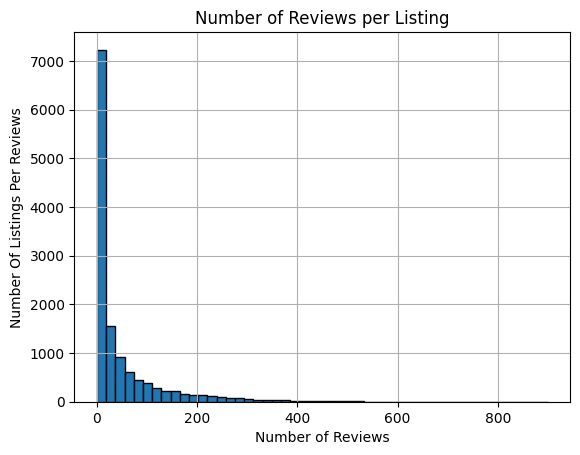

In [86]:
plt.hist(Reviews_Per_Listing_dif['Total_Reviews'],bins=np.linspace(0, bin_size, 50), edgecolor='black')
plt.title('Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Number Of Listings Per Reviews')
plt.grid(True)
plt.show()

#### Occupancy of each airbnb for each passing month

In [141]:
reviews['date'] = pd.to_datetime(reviews['date'])

We are grouping by both listing_id and date to count the reviewer_id for both listing_id and each month of the listing_id.

Keep in mind we want only till month so we are leaving the days off this.

In [142]:
reviews_per_month_dif = reviews.groupby(['listing_id',reviews['date'].dt.to_period('M')])['reviewer_id'].count().reset_index()

In [143]:
reviews_per_month_dif

,listing_id,date,reviewer_id
0,10595,2011-05,1
1,10595,2012-08,1
2,10595,2013-05,1
3,10595,2014-05,1
4,10595,2014-09,1
...,...,...,...
187626,975413215364080586,2023-09,4
187627,975966554881091774,2023-09,1
187628,976076532701121190,2023-09,1
187629,977373669051180593,2023-09,2


We are renaming the column into Total Reviews to know what we are working on.

In [144]:
reviews_per_month_dif = reviews_per_month_dif.rename(columns={'reviewer_id': 'Total_Reviews'})

In [145]:
reviews_per_month_dif.sort_values(by = 'Total_Reviews', ascending = False) 

,listing_id,date,Total_Reviews
85897,26799566,2021-04,30
163897,54251276,2022-09,28
163908,54251276,2023-08,25
100942,30616019,2022-07,24
36989,15841192,2019-06,22
...,...,...,...
98618,30195411,2021-11,1
98613,30195411,2021-06,1
98607,30195411,2020-02,1
98604,30195411,2019-11,1


Now we are grouping by only listing_id to find the Mean Reviews per month.

In [146]:
reviews_per_month_dif['total_reviews_per_month'] = reviews_per_month_dif.groupby('listing_id')['Total_Reviews'].transform('mean')

In [147]:
reviews_per_month_dif

,listing_id,date,Total_Reviews,total_reviews_per_month
0,10595,2011-05,1,1.235294
1,10595,2012-08,1,1.235294
2,10595,2013-05,1,1.235294
3,10595,2014-05,1,1.235294
4,10595,2014-09,1,1.235294
...,...,...,...,...
187626,975413215364080586,2023-09,4,4.000000
187627,975966554881091774,2023-09,1,1.000000
187628,976076532701121190,2023-09,1,1.000000
187629,977373669051180593,2023-09,2,2.000000


We will keep only two decimals.

In [148]:
reviews_per_month_dif = round(reviews_per_month_dif,2)

In [149]:
reviews_per_month_dif.sort_values(by = 'total_reviews_per_month', ascending = False) 

,listing_id,date,Total_Reviews,total_reviews_per_month
163905,54251276,2023-05,14,14.68
163908,54251276,2023-08,25,14.68
163893,54251276,2022-05,16,14.68
163894,54251276,2022-06,10,14.68
163895,54251276,2022-07,11,14.68
...,...,...,...,...
130831,39194565,2022-03,1,1.00
130832,39194565,2023-06,1,1.00
131137,39251016,2019-11,1,1.00
131174,39270898,2019-10,1,1.00


Based on our assumption we are multiplying by 2.

In [150]:
reviews_per_month_dif['occupancy'] = reviews_per_month_dif['total_reviews_per_month'] * 2

In [151]:
reviews_per_month_dif.sort_values(by = 'occupancy', ascending = False)

,listing_id,date,Total_Reviews,total_reviews_per_month,occupancy
163905,54251276,2023-05,14,14.68,29.36
163908,54251276,2023-08,25,14.68,29.36
163893,54251276,2022-05,16,14.68,29.36
163894,54251276,2022-06,10,14.68,29.36
163895,54251276,2022-07,11,14.68,29.36
...,...,...,...,...,...
130831,39194565,2022-03,1,1.00,2.00
130832,39194565,2023-06,1,1.00,2.00
131137,39251016,2019-11,1,1.00,2.00
131174,39270898,2019-10,1,1.00,2.00


We are creating a new dataframe to have only the columns listing_id and occupancy that we need.

In [165]:
reviews_per_month_final = reviews_per_month_dif[['listing_id','occupancy']]

In [166]:
reviews_per_month_final

,listing_id,occupancy
0,10595,2.48
1,10595,2.48
2,10595,2.48
3,10595,2.48
4,10595,2.48
...,...,...
187626,975413215364080586,8.00
187627,975966554881091774,2.00
187628,976076532701121190,2.00
187629,977373669051180593,4.00


We are deleting duplicates to work only with unique values and listing_ids

In [167]:
reviews_per_month_final = reviews_per_month_final.drop_duplicates(subset=['listing_id', 'occupancy'])

In [168]:
reviews_per_month_final=reviews_per_month_final.sort_values(by='occupancy', ascending = False)

In [169]:
reviews_per_month_final

,listing_id,occupancy
163891,54251276,29.36
141571,43778929,21.60
186430,914571599230791078,21.50
143074,44403858,21.00
167525,597450052043728545,20.86
...,...,...
184059,866363618555432360,2.00
184051,866301094035717759,2.00
156626,51304185,2.00
156721,51321294,2.00


#### Average income per month

Again we are finding the average price of all prices in the dataframe list.

In [159]:
average_price = list['price'].mean()

In [160]:
average_price = round(average_price, 2)

In [161]:
average_price

100.01

We are multiplying by the occupancy by 3 which is the assumption of three night stay and by the average price.

In [171]:
reviews_per_month_final['average_income'] = reviews_per_month_final['occupancy'] * 3 * average_price

In [172]:
reviews_per_month_final = round(reviews_per_month_final,2)

In [173]:
reviews_per_month_final.sort_values(by = 'average_income', ascending = False)

,listing_id,occupancy,average_income
163891,54251276,29.36,8808.88
141571,43778929,21.60,6480.65
186430,914571599230791078,21.50,6450.64
143074,44403858,21.00,6300.63
167525,597450052043728545,20.86,6258.63
...,...,...,...
69677,23578239,2.00,600.06
68693,23391382,2.00,600.06
68690,23386788,2.00,600.06
67474,23136177,2.00,600.06


Keep in mind that any listing_id outside of this dataframe has mean price per month 0 dollars and that's the reason it is not involved in the dataframe. 

### Q5: Listings per Room Type

In this step we want to calculate the total number of listings for every room type, firstly in absolute numbers and then in percentages. After that, we are going to show the numbers of listings per neighbourhood and per room type. This way we will see which room type is more popular and in which neighbourhoods.

Show the number of listings per room type, in absolute numbers. We will pick the columns 'room_type' in the list dataframe and use the method .value_counts() to sum the number of each type.

In [109]:
listings_room_type = list['room_type'].value_counts().reset_index()

In [110]:
listings_room_type.columns = ['room_type', 'total_number']

In [111]:
listings_room_type

,room_type,total_number
0,Entire home/apt,11652
1,Private room,1113
2,Hotel room,105
3,Shared room,85


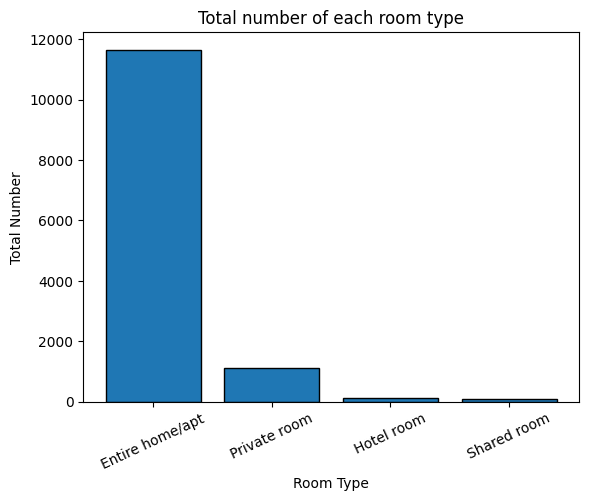

In [112]:
plt.bar(listings_room_type['room_type'], listings_room_type['total_number'], edgecolor='black')
plt.title('Total number of each room type')
plt.xlabel('Room Type')
plt.xticks(rotation=25)
plt.ylabel('Total Number')
plt.show()

* Also in percentages

But first, we will rename the columns to be more representative.


In [113]:
listings_room_type['total_number_percentage'] = (listings_room_type['total_number']/len(list['id'])) * 100

In [114]:
listings_room_type

,room_type,total_number,total_number_percentage
0,Entire home/apt,11652,89.942107
1,Private room,1113,8.591277
2,Hotel room,105,0.810498
3,Shared room,85,0.656117


**Conclusion:**
Nearly 9 out of 10 airbnbs in Athens are entire homes, with only a few percentage of private rooms, hotels and shared rooms.

Show the number of listings per neighrbourhood and room type. We will group by the neighbourhood and also the room type and then find the size for each pair of group.

In [115]:
listing_counts = list.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(name='total_number')

In [116]:
listing_counts

,neighbourhood_cleansed,room_type,total_number
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,Entire home/apt,55
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Entire home/apt,33
2,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Private room,5
3,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire home/apt,686
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Hotel room,4
...,...,...,...
106,ΣΤΑΔΙΟ,Private room,11
107,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Entire home/apt,73
108,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Hotel room,4
109,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Private room,4


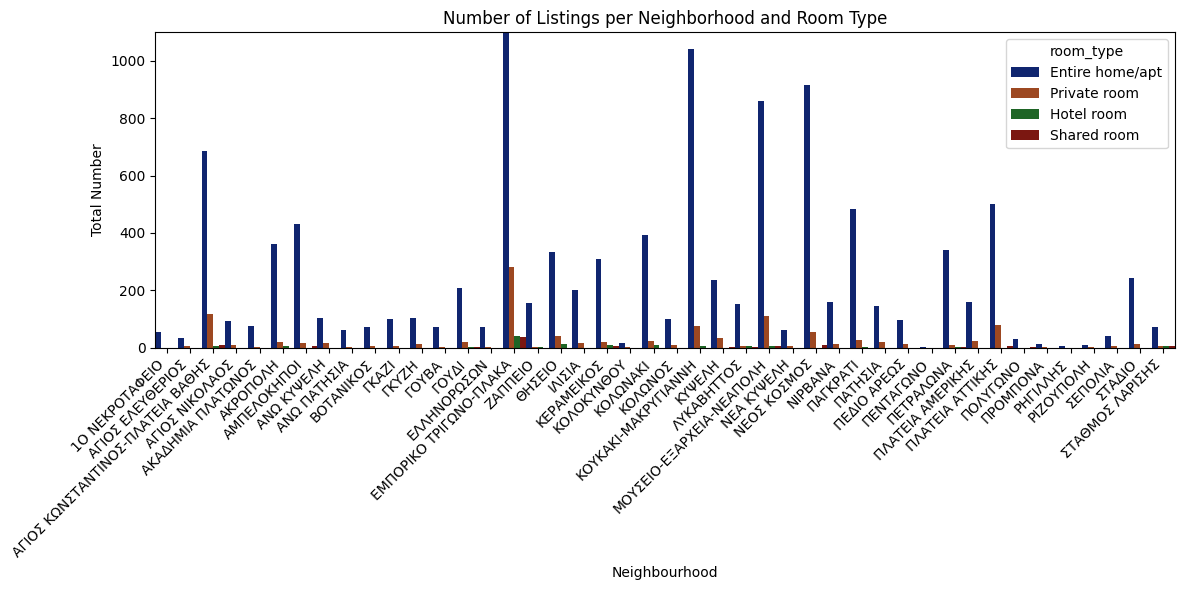

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(x=listing_counts['neighbourhood_cleansed'], y=listing_counts['total_number'], hue="room_type", data=listing_counts, palette="dark",width=1.0)
plt.xlabel("Neighbourhood")
plt.ylabel("Total Number")
plt.title("Number of Listings per Neighborhood and Room Type")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1100)
plt.tight_layout()
plt.show()

**Conclusion:**
Here we can check for each neighbourhood and for each room type the total number of airbnbs in Athens.

## Q6: Prices per Day

The main goal of this querry is to find the average price per listing per day. We decide to devide this step in two new ways of approaching it.

**First Approach: calculate the average price per day for all listings**

In [118]:
calendar['date'] = pd.to_datetime(calendar['date'])

We will group by the column date and find the mean price for each date for all listings!

In [119]:
avg_price_per_day = calendar.groupby('date')['price'].mean().reset_index()

In [120]:
avg_price_per_day

,date,price
0,2023-09-21,102.281227
1,2023-09-22,105.385828
2,2023-09-23,105.438399
3,2023-09-24,102.219470
4,2023-09-25,100.802765
...,...,...
360,2024-09-15,110.160537
361,2024-09-16,109.639734
362,2024-09-17,109.622289
363,2024-09-18,109.535373


We decide to create a plot so we can see for each passing day from 2023 to 2024 how much it costs for someone to rent an airbnb in average.

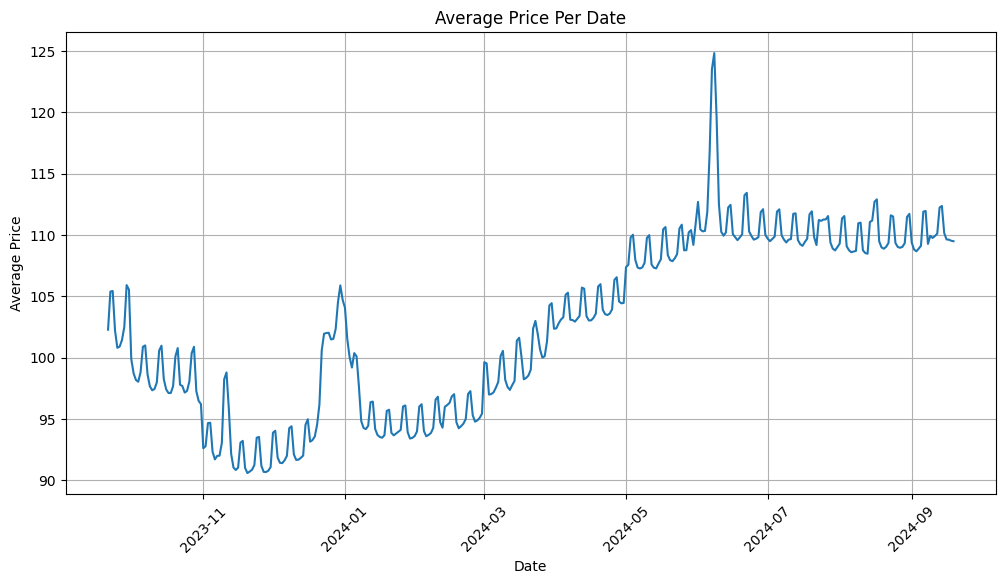

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(avg_price_per_day['date'], avg_price_per_day['price'])
plt.title('Average Price Per Date')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Conclusion:** We see that in the 2023 we have falling prices with an increase in the price of 2023-12 due to christmas. For 2024 we check a big increase with the largest one being in the summer time. We can explain these mainly in two reasons. First of all always in the summer we have a lot of tourists so the prices are going up and secondly we are passing through times of inflation, so the money has lost some of it's value and as a result the prices for 2024 are already increasing.

**Second Approach: Calculate the mean price per listing_id for all the dates, in other words for all the year**

In [122]:
list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [123]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In this approach we will check what price each airbnb is expected to charge it's customers!

In [124]:
avg_price_per_listing = calendar.groupby('listing_id')['price'].mean().reset_index()

In [125]:
avg_price_per_listing = round(avg_price_per_listing,2)

In [126]:
avg_price_per_listing.sort_values(by='price', ascending = False)

,listing_id,price
896,14757686,5000.00
8274,649834015596287176,4598.72
11460,899735197808250850,3636.23
11846,917104197751120765,3633.01
2842,28042027,2175.69
...,...,...
6730,51852169,11.53
4206,35349850,11.28
6745,51970740,11.10
4205,35349352,11.00


Once more our data are too big to visualize them easily, so we are deciding to place them into a histogram and so the frequency of them. We are also going to use log y axis so small frequencies such as 2500 dollars will appear. 

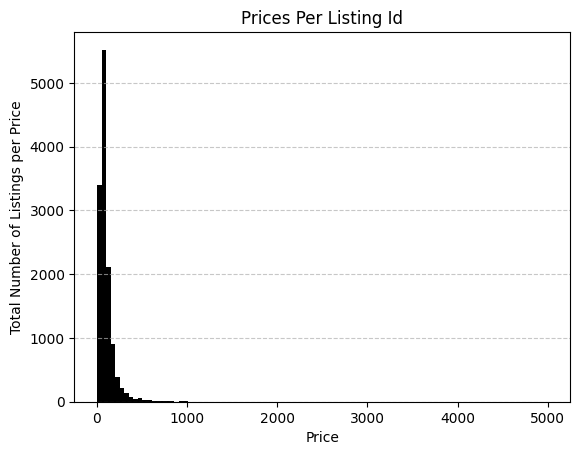

In [127]:
plt.hist(avg_price_per_listing['price'], bins=np.linspace(0, 5000, 100), color='black')
plt.title('Prices Per Listing Id')
plt.xlabel('Price')
plt.ylabel('Total Number of Listings per Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Here we can see that between 0-1000 euros are the most prices and more specifically between 0-200 dollars per night per listing_id.

## Q7: Listings per Host

Now we will see how many airbnbs has each host and place them in a descending order. 

In this step we group by the host_id and count all the id's, which are the airbnb's.

In [128]:
listings_per_host = list.groupby('host_id')['id'].count().reset_index()

In [129]:
listings_per_host.rename(columns={'id': 'Total_Listings'}, inplace=True)

In [130]:
listings_per_host = listings_per_host.sort_values(by = 'Total_Listings', ascending= False)

In [131]:
listings_per_host

,host_id,Total_Listings
607,20104194,114
2069,113548208,88
1811,90390850,78
60,748818,74
1149,47267002,61
...,...,...
2242,130728079,1
2241,130646248,1
2240,130612477,1
2239,130551473,1


For the next step we want to create a column named 'Ranking' in which all the host's will be ranked with a number based on how many airbnb's they have. In case some hosts have the same number of airbnb they will be ranked one next to each other.  

In [132]:
listings_per_host['Ranking'] = listings_per_host['Total_Listings'].rank(method='first', ascending = False).astype(int)

In [133]:
listings_per_host.sort_values(by = 'Ranking', ascending =True)

,host_id,Total_Listings,Ranking
607,20104194,114,1
2069,113548208,88,2
1811,90390850,78,3
60,748818,74,4
1149,47267002,61,5
...,...,...,...
2242,130728079,1,5770
2241,130646248,1,5771
2240,130612477,1,5772
2239,130551473,1,5773


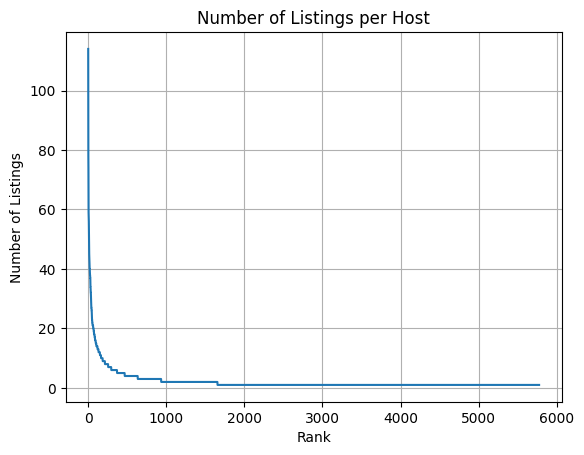

In [134]:
plt.plot(listings_per_host['Ranking'], listings_per_host['Total_Listings'])
plt.xlabel('Rank')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Host')
plt.grid(True)
plt.show()

 Conclusion:
In the graph we can see the ranks with the number of airbnbs a person has! 

This time we will create a plot with the $x$ axis in *logarithmic* scale. The reason for this is because the above graph is not as much visible as we would like it to be.

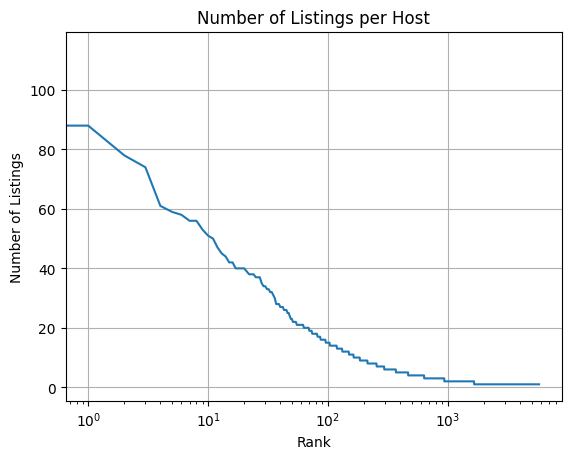

In [135]:
plt.plot(range(len(listings_per_host)), listings_per_host['Total_Listings'])
plt.xlabel('Rank')
plt.ylabel('Number of Listings')
plt.xscale('log')
plt.title('Number of Listings per Host')
plt.grid(True)
plt.show()

 Conclusion:
In this one we can see better the difference in the amount of airbnbs a person has. In the first one we can see someone so large that passes the 100 airbnbs.

## Q8: Visualize Listings

In this part we want to place all the airbnbs in an Athens map with a brief description of each one. For this one we will use the folium library

In [186]:
import folium
from folium.plugins import MarkerCluster

First step is to give the main position of the map we are working on, we are giving the 'map' the location of Athens and the zoom start which we have put as 15 so the visualization will not have any problems. 

In [187]:
map = folium.Map(location = [list['latitude'].mean(), list['longitude'].mean()], zoom_start= 15) 

We are creating a method which will place all the airbnbs based on their geographical location and also place in each one of them a short description for the user to quickly check.

In [188]:
marker_cluster = MarkerCluster(name = 'marker_cluster').add_to(map)

In [189]:
def add_marker(row):
    folium.Marker(location=[row['latitude'], row['longitude']], popup = f"Neighbourhood: {row['neighbourhood_cleansed']}<br>Type: {row['room_type']}", parse_html=True).add_to(marker_cluster)
list.apply(add_marker, axis=1)

12128    None
2350     None
1008     None
4188     None
4202     None
         ... 
4894     None
5986     None
5432     None
2466     None
932      None
Length: 12955, dtype: object

We applied them all and now we are saving it locally to our environment so we can see it because jupyter cannot handle these amount of data. 

In [190]:
folium.LayerControl().add_to(map)

In [191]:
map.save('map.html')